In [ ]:
!pip install qiskit-terra[visualization]

In [ ]:
# import libraries
import qiskit.tools.jupyter
import matplotlib.pyplot as plt
%qiskit_version_table
from qiskit import Aer, transpile
from qiskit import IBMQ, QuantumCircuit, transpile
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram, plot_gate_map
import matplotlib.pyplot as plt
import networkx as nx
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
import numpy as np
from qiskit.circuit.library import StatePreparation
from qiskit.quantum_info import Statevector
import math
import random
import datetime

In [33]:
# initial graph
def initial_graph() :
        return {   
            'A': {'B':1, 'C':4, 'D':2},
            'B': {'A':1, 'E':5},
            'C': {'A':4, 'F':15},
            'D': {'A':2, 'F':14},
            'E': {'B':5, 'J':7},
            'F': {'C':15, 'D':14, 'K':6, 'G':12},
            'G': {'F':12, 'I':4},
            'H': {'J':2},
            'I': {'G':4, 'J':4},
            'J': {'E':7, 'H':2, 'I':4},
            'K': {'F':6}
        }

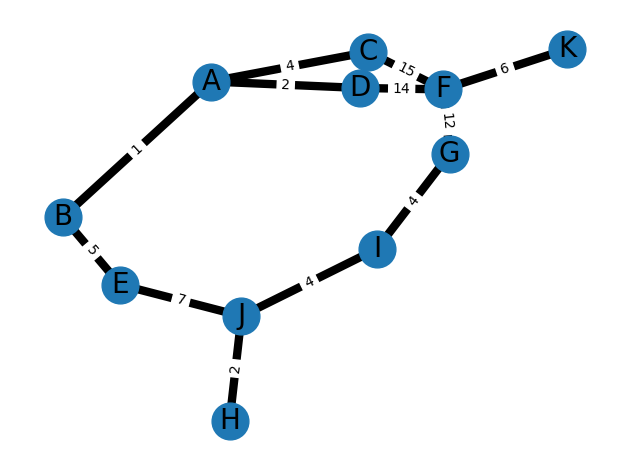

In [34]:
# initialize variables
graph = initial_graph()
initial = 'A'
final = 'H'

# draw graph
G = nx.Graph()
for node in graph:
    for edge in graph[node]:
        G.add_edge(node, edge, weight=graph[node][edge])
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
ax = plt.gca()
#ax.margins(0.01)
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

In [35]:
backend = Aer.get_backend('aer_simulator')
#plot_gate_map(backend)

In [36]:
def find_min(values):
    qubits_needed = max(2,math.ceil(math.log(len(values),2)))
    padding = 2**qubits_needed - len(values)
    for i in range(padding):
        values.append(0)
    norm = np.linalg.norm(values)
    SP = StatePreparation(values / norm)
    qc = QuantumCircuit(qubits_needed)
    qc.append(SP, [i for i in range(qubits_needed)])
    qc.measure_all()
    result = execute(qc, backend, shots=1024).result()
    counts = result.get_counts(qc)
    new_dict = dict([(value, key) for key, value in counts.items()])
    plot_histogram(counts)
    return values[int(new_dict[min(new_dict.keys())], 2)]


In [37]:
def dijkstra(initial, final, length, temp_path, sort):
    global adj_node
    queue = []
    sorted = sort(list(graph[initial].values()))
    for x in sorted:
        for i in graph[initial]:
            if i not in queue and graph[initial][i] == x:
                queue.append(i)
    result = 0
    while queue:
        i = queue.pop(0)
        temp_path[initial] = i
        if i == final:
            if (path[i] == 0 and i != first) or length+graph[initial][i] < path[i]:
                path[i] = length+graph[initial][i]
                adj_node = {key: value for (key, value) in temp_path.items()}
                return 1
            else:
                return 0
        elif (path[i] == 0 and i != first) or length+graph[initial][i] < path[i]:
            path[i] = length+graph[initial][i]
            result += dijkstra(i, final, path[i], temp_path, sort)
            if result > 0:
                temp_path = {}
    return result

In [38]:
def quantum_sort(values):
    temp = []
    for i in range(len(values)):
        smallest = find_min(values)
        temp.append(smallest)
        values.remove(smallest)
    return temp

In [39]:
def classical_sort(values):
    temp = []
    for i in range(len(values)):
        smallest = min(values)
        temp.append(smallest)
        values.remove(smallest)
    return temp

In [40]:
for i in range(10):
    first = 'A'
    final = 'H'
    adj_node = {}
    path = {key: 0 for key in graph.keys()}
    startTime = datetime.datetime.now()
    for i in range(100):
        dijkstra(first, final, 0, {}, classical_sort)
    endTime = datetime.datetime.now()
    node = first
    for i in range(len(adj_node)):
        print(node, end=' -> ')
        node = adj_node[node]
    print(node)
    print(endTime-startTime)

A -> B -> E -> J -> H
0:00:00
A -> B -> E -> J -> H
0:00:00
A -> B -> E -> J -> H
0:00:00.000993
A -> B -> E -> J -> H
0:00:00.000999
A -> B -> E -> J -> H
0:00:00
A -> B -> E -> J -> H
0:00:00.001000
A -> B -> E -> J -> H
0:00:00.001000
A -> B -> E -> J -> H
0:00:00
A -> B -> E -> J -> H
0:00:00.001000
A -> B -> E -> J -> H
0:00:00


In [41]:
for i in range(10):
    first = 'A'
    final = 'H'
    adj_node = {}
    path = {key: 0 for key in graph.keys()}
    startTime = datetime.datetime.now()
    for i in range(100):
        dijkstra(first, final, 0, {}, quantum_sort)
    endTime = datetime.datetime.now()
    node = first
    for i in range(len(adj_node)):
        print(node, end=' -> ')
        node = adj_node[node]
    print(node)
    print(endTime-startTime)

A -> B -> E -> J -> H
0:00:10.892001
A -> B -> E -> J -> H
0:00:10.971006
A -> B -> E -> J -> H
0:00:11.186993
A -> B -> E -> J -> H
0:00:11.268001
A -> B -> E -> J -> H
0:00:11.077003
A -> B -> E -> J -> H
0:00:11.101997
A -> B -> E -> J -> H
0:00:11.225999
A -> B -> E -> J -> H
0:00:11.211001
A -> B -> E -> J -> H
0:00:11.352139
A -> B -> E -> J -> H
0:00:11.129002


2


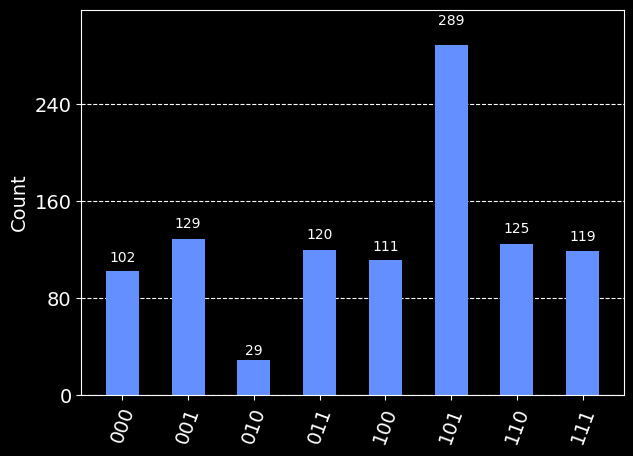

In [303]:
values = [2, 2, 1, 2, 2, 3, 2, 2]
min_index = find_min(values)
print(min_index)
plt.style.use('dark_background')
plot_histogram(counts)